In [10]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# reading the dataset
df = pd.read_csv("../data/telecom_churn.csv")

In [7]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [12]:
# checking the size of the dataset
df.shape

(3333, 11)

# this output means we have 3333 customers with 11 columns

In [15]:
# now checking the column types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [16]:
# since we are segmenting the customers based on their behavior, we will select only those features and drop the outcomes, i.e, the churn column
X = df.drop("Churn", axis=1)
X.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [18]:
# we are scaling the features so that any large figure wont dominate the entire nature of clustering process
from sklearn.preprocessing import StandardScaler
# this tool subtracts mean, divides by standard deviation and centers data around 0

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
X_scaled[:5]

array([[ 0.67648946,  0.32758048,  1.6170861 ,  1.48020373, -0.42793202,
         1.56676695,  0.47664315,  1.99072703, -0.0715836 , -0.08500823],
       [ 0.14906505,  0.32758048,  1.6170861 ,  2.26607248, -0.42793202,
        -0.33373776,  1.12450284,  1.56451025, -0.10708191,  1.24048169],
       [ 0.9025285 ,  0.32758048, -0.61839626, -0.64164192, -1.1882185 ,
         1.16830364,  0.67598459, -0.26213309, -1.57434567,  0.70312091],
       [-0.42859027, -3.05268496, -0.61839626, -0.64164192,  0.33235445,
         2.19659605, -1.46693591,  0.04230746, -2.74184587, -1.30302599],
       [-0.6546293 , -3.05268496, -0.61839626, -0.64164192,  1.09264093,
        -0.24008971,  0.62614923, -0.93190232, -1.03792666, -0.04918418]])

In [24]:
# the next step is to decide on number of clusters using the elbow method; we will begin by importing k-means
from sklearn.cluster import KMeans

In [25]:
# calculating inertia for different cluster counts
inertia = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

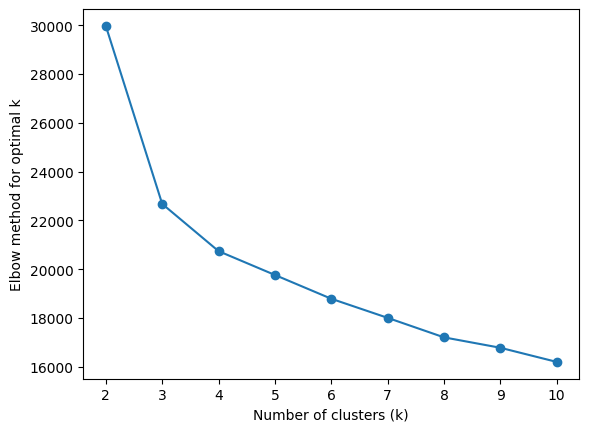

In [27]:
# plotting the elbow graph
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Elbow method for optimal k')
plt.show()

In [28]:
# according to the graph, k=4 is ideal because 3 is bit too coarse and 4 gives better seperation, more meaningful customer personas and better business storytelling
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [29]:
df['Cluster'] = clusters
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Cluster
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,2
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,2
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,1
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,0
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,0


In [30]:
df['Cluster'].value_counts()

Cluster
1    1121
3    1073
2     825
0     314
Name: count, dtype: int64

In [31]:
df.groupby('Cluster').mean()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Cluster,,,,,,,,,,,
0,0.410828,104.194268,0.000000,0.264331,0.797420,1.449045,186.321338,100.605096,57.410510,10.175223,10.491083
1,0.180196,97.838537,1.000000,0.000000,0.071320,1.543265,215.964585,99.358608,56.450045,10.896432,10.013381
2,0.063030,100.871515,0.989091,1.000000,2.785830,1.545455,181.019636,99.631515,76.411030,10.172327,10.315758
3,0.093197,103.668220,1.000000,0.013048,0.086356,1.630009,139.094129,102.129543,40.371482,9.039627,10.336626


In [32]:
df.groupby("Cluster")['Churn'].mean()

Cluster
0    0.410828
1    0.180196
2    0.063030
3    0.093197
Name: Churn, dtype: float64

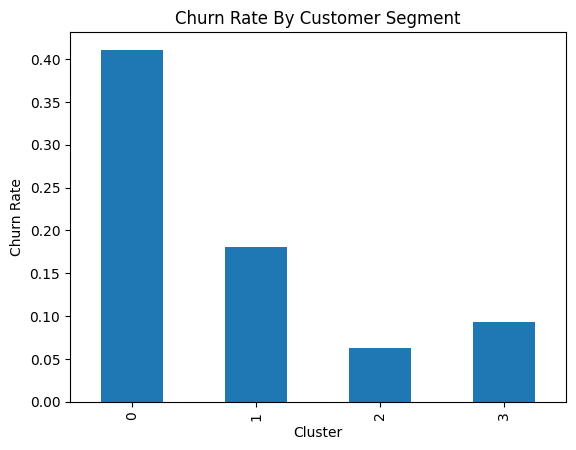

In [33]:
# visualizing bar chart for churn rate
churn_by_cluster = df.groupby('Cluster')["Churn"].mean()

churn_by_cluster.plot(kind='bar')
plt.xlabel("Cluster")
plt.ylabel('Churn Rate')
plt.title('Churn Rate By Customer Segment')
plt.show()

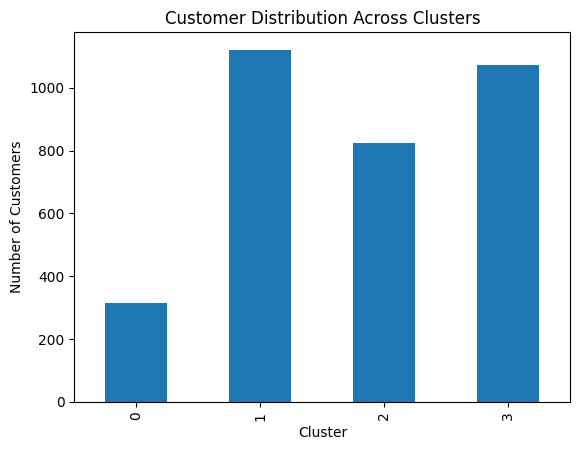

In [34]:
# visualizing bar chart of cluster sizes
df["Cluster"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.title("Customer Distribution Across Clusters")
plt.show()

In [35]:
# visulaizing feature comparison across clusters
features_to_plot = [
    "MonthlyCharge",
    "DayMins",
    "DataUsage",
    "CustServCalls"
]

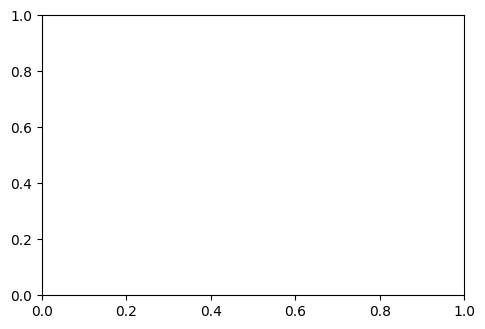

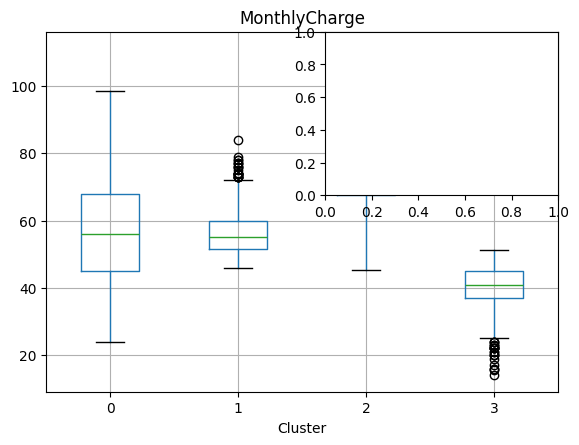

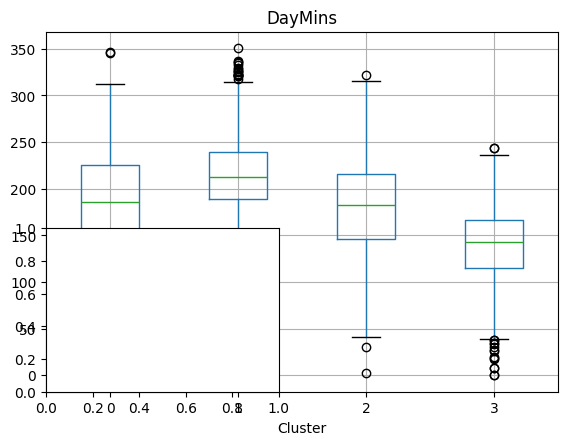

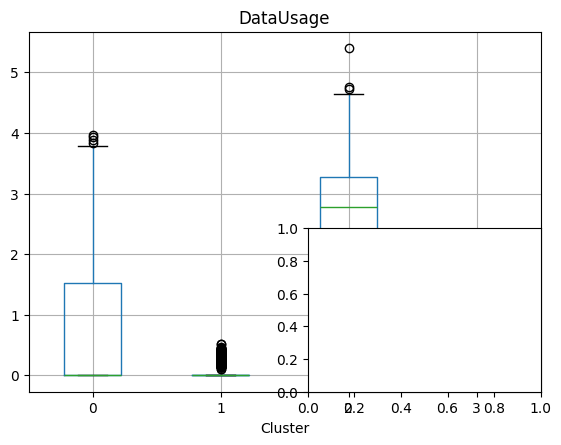

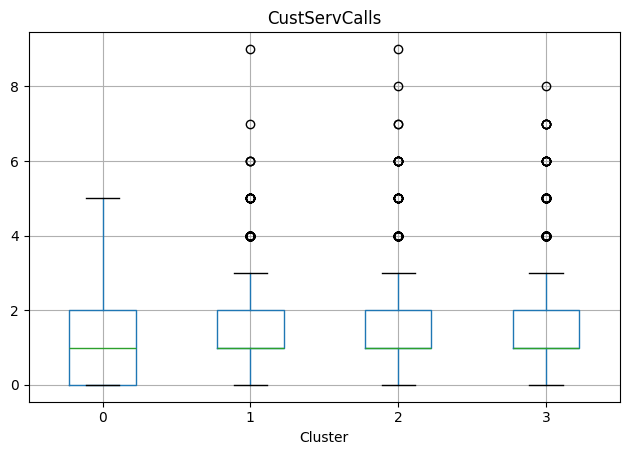

In [36]:
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    df.boxplot(column=feature, by="Cluster")
    plt.title(feature)
    plt.suptitle("")

plt.tight_layout()
plt.show()